              Exploring, Assessing and Leveraging Trends of Funding Startups within the Indian Ecosystem

India, one of the world’s fastest-growing economies, has witnessed an extraordinary surge in its start-up ecosystem over the past decade. This growth has been propelled by various factors, including increased funding availability, supportive government policies, and a pool of skilled talent. As a result, start-ups have emerged as crucial drivers of innovation and employment generation, contributing substantially to the country’s economic progress. In 2022, approximately 26,000 tech start-ups were operational in the country, and the total unicorn count reached an impressive 89, with 175 potential unicorns on the horizon. 

The aim of this data analysis is to provide comprehensive understanding on how the startup ecosystem has developed over the years in India, understand the growth drivers as well as the challenges. 

 

In [348]:
#import all necessary packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [349]:
#load environment values from .env file into a dictionary
environment_variables = dotenv_values('.env')

#get the values for the credentials you set in the env file into a dictionary
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
print(database,username,server,password)


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


dapDB LP1_learner dap-projects-database.database.windows.net Hyp0th3s!$T3$t!ng


In [350]:
#connect to the server using the pyodbc library and pass in the connection string

connection = pyodbc.connect(connection_string)

                                             HYPOTHESIS

**Hypothesis : Sector and Funding Amount**
 
* Null Hypothesis (H0): The sector in which a startup operates has no significant impact on the amount of funding it receives.  
*  Alternative Hypothesis (H1): The sector in which a startup operates has significant impact on the amount of funding it receives.

                                           DATA COLLECTION

In [351]:
#I connected to the data on mySQL server to get funding for 2020
query = 'SELECT * FROM dbo.LP1_startup_funding2020;'
data_2020 = pd.read_sql_query(query, connection)
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,None,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed,None
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,None,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.00,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.00,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.00,Seed Round,None
1052,Purplle,2012.00,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.00,None,None
1053,Shuttl,2015.00,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.00,Series C,None


In [352]:
#get to know the datatypes of the dataset
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [353]:
#I connected to the data on mySQL server to get funding for 2021
query2 = 'SELECT * FROM dbo.LP1_startup_funding2021;'
data_2021 = pd.read_sql_query(query2, connection)
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [354]:
#get to know the datatypes of the dataset
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [355]:
#I specified the encoding when reading the CSV file for 2019 since it was bringing a 'UnicodeDecodeError' without the encoding
data_2019 = pd.read_csv('startup_funding2019.csv', encoding='latin-1')
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [356]:
#get to know the datatypes of the dataset
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [357]:
#I connected to the 2018 dataset provided in the OneDrive
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [358]:
#get to know the datatypes of the dataset
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


                                                   DATA CLEANING

                                      ** Cleaning the 2018 dataset**

In [359]:
#trying to see how much missing values there are in the dataset
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

The 2018 dataset has no missing values. However, there are some differences with the other datasets. It has fewer columns and also the labeling of some columns differs from the other datasets. So I'll first split the location into city, state and country then drop the location, state and country. Thereafter, I'll rename City to Headquarters, Company Name to Company Brand, About Company to What it does, Round/Series to Stage, Industry to Sector; so that it matches the other datasets

In [360]:
#Splitting location to city, state and country
data_2018[['City', 'State', 'Country']] = data_2018['Location'].str.split(',', expand=True)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,City,State,Country
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,India
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,India
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,Gurgaon,Haryana,India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,India
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",Bangalore,Karnataka,India
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,Haryana,Haryana,India
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,Mumbai,Maharashtra,India
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,Mumbai,Maharashtra,India


In [361]:
#dropping location, state and country
data_2018 = data_2018.drop(columns = ['Location', 'State', 'Country'])
data_2018

,Company Name,Industry,Round/Series,Amount,About Company,City
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,—,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [362]:
#change column headings
data_2018 = data_2018.rename(columns={'Company Name':'Company_Brand', 'City':'HeadQuarter', 'About Company':'What_it_does', 'Round/Series':'Stage', 'Industry':'Sector'})
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,—,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [363]:
#2018 Exchange rate Rupee to a Dollar.
exchange_rate = 0.0146
 
def rupee_to_dollar(amount):
    if isinstance(amount, str) and amount.startswith('₹'):
        amount = float(amount.replace(',', '')[1:]) * exchange_rate
        return f'${amount:.2f}'
    else:
        return amount
 
 #remove rupee sign and comma, and convert to dollar equivalent
data_2018['Amount'] = data_2018['Amount'].apply(lambda x: rupee_to_dollar(x))
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,—,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [364]:
#inspecting the Amount column
data_2018['Amount'].unique()

array(['250000', '$584000.00', '$949000.00', '2000000', '—', '1600000',
       '$233600.00', '$730000.00', '$1460000.00', '150000', '1100000',
       '$7300.00', '6000000', '650000', '$511000.00', '$934400.00',
       '$292000.00', '1000000', '5000000', '4000000', '$438000.00',
       '2800000', '1700000', '1300000', '$73000.00', '$182500.00',
       '$219000.00', '500000', '$1518400.00', '$657000.00', '13400000',
       '$365000.00', '$385440.00', '$116800.00', '$876.00', '9000000',
       '100000', '20000', '120000', '$496400.00', '$4993200.00',
       '$143,145', '$8760000.00', '$742,000,000', '$14600000.00',
       '$29200000.00', '$3,980,000', '$10,000', '$1460.00', '$3650000.00',
       '$1,000,000,000', '$7,000,000', '$35,000,000', '$8030000.00',
       '$28,500,000', '$2,000,000', '$3504000.00', '$1752000.00',
       '$2,400,000', '$30,000,000', '$36500000.00', '$23,000,000',
       '$150,000', '$11,000,000', '$642400.00', '$3,240,000',
       '$876000.00', '$540,000,000', '$94

In [365]:
# Cleaning the Amounts column
data_2018['Amount'] = data_2018['Amount'].apply(str)
data_2018['Amount'].replace(',', '', inplace = True, regex=True)
data_2018['Amount'].replace("—", '0', inplace = True, regex=True)
data_2018['Amount'].replace('$', '', inplace = True, regex=True)
data_2018


,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,0,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [366]:
#inspecting the Amount column
data_2018['Amount'].unique()

array(['250000', '$584000.00', '$949000.00', '2000000', '0', '1600000',
       '$233600.00', '$730000.00', '$1460000.00', '150000', '1100000',
       '$7300.00', '6000000', '650000', '$511000.00', '$934400.00',
       '$292000.00', '1000000', '5000000', '4000000', '$438000.00',
       '2800000', '1700000', '1300000', '$73000.00', '$182500.00',
       '$219000.00', '500000', '$1518400.00', '$657000.00', '13400000',
       '$365000.00', '$385440.00', '$116800.00', '$876.00', '9000000',
       '100000', '20000', '120000', '$496400.00', '$4993200.00',
       '$143145', '$8760000.00', '$742000000', '$14600000.00',
       '$29200000.00', '$3980000', '$10000', '$1460.00', '$3650000.00',
       '$1000000000', '$7000000', '$35000000', '$8030000.00', '$28500000',
       '$2000000', '$3504000.00', '$1752000.00', '$2400000', '$30000000',
       '$36500000.00', '$23000000', '$150000', '$11000000', '$642400.00',
       '$3240000', '$876000.00', '$540000000', '$9490000.00',
       '$23360000.00', '$9

In [367]:
#inspecting the Company Brand column
data_2018['Company_Brand'].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', 'PayMe India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
     

In [368]:
#inspecting the Sector column
data_2018['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [369]:
#inspecting the Stage column
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [370]:
#replace the link with null values
data_2018['Stage']=data_2018['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.nan)

In [371]:
#replace the undisclosed with null values
data_2018['Stage']=data_2018['Stage'].replace('Undisclosed',np.nan)
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,0,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [372]:
#inspecting the Stage column again
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', nan, 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

In [373]:
#There are some missing values in the Stage column so I'll fill them in with the adjacent data
data_2018['Stage'] = data_2018['Stage'].fillna(method='ffill')
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore
522,Happyeasygo Group,"Tourism, Travel",Series A,0,HappyEasyGo is an online travel domain.,Haryana
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai


In [374]:
#inspecting the What it does column
data_2018['What_it_does'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India',
       'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
       'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
       'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
       'Tripshelf is an online market place for holiday packages.',
       'Hyperdata combines advanced machine learning with human intelligence.',
       'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
       'Microchip payments is a mobile-based payment application and point-of-sale device',
       'Building Transactionary B2B Marketplaces',
       'Emoji

In [375]:
#inspecting the HeadQuarter column
data_2018['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [376]:
#creating a new column indicating the Year Founded
data_2018['Year Founded'] = 2018
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter,Year Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore,2018
522,Happyeasygo Group,"Tourism, Travel",Series A,0,HappyEasyGo is an online travel domain.,Haryana,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai,2018
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai,2018


In [377]:
#checking to see if there are any more missing values
data_2018.isnull().sum()

Company_Brand    0
Sector           0
Stage            0
Amount           0
What_it_does     0
HeadQuarter      0
Year Founded     0
dtype: int64

There are no more missing values in the 2018 dataset

In [378]:
#checking for duplicates
data_2018.duplicated().sum()

1

In [379]:
data_2018.drop_duplicates(inplace=True)
data_2018

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter,Year Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",Bangalore,2018
522,Happyeasygo Group,"Tourism, Travel",Series A,0,HappyEasyGo is an online travel domain.,Haryana,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,Mumbai,2018
524,Droni Tech,Information Technology,Seed,$511000.00,Droni Tech manufacture UAVs and develop softwa...,Mumbai,2018


In [380]:
#checking for duplicates again
data_2018.duplicated().sum()

0

                              **Cleaning the 2019 dataset**

In [381]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

The 2019 dataset has some missing values in the Founded, HeadQuarter, Sector, Founders, and Stage columns. There's also a mismatch in the labeling of the Company Brand and Amount columns so I'll rename them

In [382]:
#change column headings
data_2019 = data_2019.rename(columns={'Company/Brand':'Company_Brand', 'Amount($)':'Amount'})
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [383]:
#inspecting the Founded column
data_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [384]:
#replace missing data in the Founded column
data_2019['Founded']= data_2019['Founded'].fillna(method = 'bfill')
data_2019

data_2019['Founded']= data_2019['Founded'].fillna(method = 'ffill')
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.00,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [385]:
#inspecting the HeadQuarter column
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [386]:
#There are some missing values in the HeadQuarter column so I'll fill them in with the adjacent data
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna(method='bfill')
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna(method='ffill')
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.00,Mumbai,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [387]:
#inspecting the Sector column
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [388]:
#There are some missing values in the Sector column so I'll fill them in with the adjacent data
data_2019['Sector'] = data_2019['Sector'].fillna(method='ffill')
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.00,Mumbai,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [389]:
#inspecting the Stage column
data_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [390]:
#There are some missing values in the Stage column so I'll fill them in with the adjacent data
data_2019['Stage'] = data_2019['Stage'].fillna(method='bfill')
data_2019

data_2019['Stage'] = data_2019['Stage'].fillna(method='ffill')
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.00,Mumbai,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series C
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Pre series A
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series B
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series B


In [391]:
#inspecting the Founders column
data_2019['Stage'].unique()

array(['Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [392]:
#There are some missing values in the Founders column so I'll fill them in with the adjacent data
data_2019['Founders'] = data_2019['Founders'].fillna(method='bfill')
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,2014.00,Mumbai,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series C
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Pre series A
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series B
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series B


In [393]:
#checking to see if there are any more missing values
data_2019.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

There are no more missing values in the 2019 dataset

In [394]:
#creating a new column indicating the Year Founded
data_2019['Year Founded'] = 2019
data_2019

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year Founded
0,Bombay Shaving,2014.00,Mumbai,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series C,2019
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,2014.00,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Pre series A,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2013.00,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series B,2019
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series B,2019


In [395]:
#checking to see if there are any duplicates
data_2019.duplicated().sum()

0

There are no duplicates in the 2019 dataset

          Cleaning the 2020 dataset

In [396]:
#checking for missing values
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

The 2020 dataset has some missing values in the Founded, HeadQuarter, Sector, Founders, Investor, Amount, Stage and column10 columns.

In [397]:
#inspecting the Founded column
data_2020['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [398]:
#inspecting the HeadQuarter column
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [399]:
#inspecting the Sector column
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [400]:
#inspecting the Founders column
data_2020['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [401]:
#inspecting the Investor column
data_2020['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [402]:
#inspecting the Stage column
data_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [403]:
#inspecting the Amount column
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [404]:
#Cleaning the amount column
data_2020["Amount"] = data_2020["Amount"].apply(str)
data_2020["Amount"].replace(",","", inplace = True, regex=True)
data_2020["Amount"].replace("Undisclosed", 0, inplace = True, regex=True)
data_2020["Amount"].replace("Undiclsosed", 0, inplace = True, regex=True)
data_2020["Amount"].replace("Undislosed", 0, inplace = True, regex=True)
data_2020["Amount"].replace("nan", 0, inplace = True, regex=True)

data_2020["Amount"] = data_2020["Amount"].apply(lambda x:(str(x).replace("$","")))
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,None
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.00,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.00,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [405]:
#I'm going to drop column10 since it has no values and my assumption is that it won't help us in the analysis
data_2020 = data_2020.drop('column10', axis=1)
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.00,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None
1053,Shuttl,2015.00,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [406]:
#checking for missing values
data_2020.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            464
dtype: int64

I will leave the remaining missing values so as not to intefere with the analysis

In [407]:
#creating a new column indicating the Year Founded
data_2020['Year Founded'] = 2020
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Founded
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,2020
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012.00,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,2020
1053,Shuttl,2015.00,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [408]:
#checking for duplicates
data_2020.duplicated().sum()

3

There are some duplicates in the 2020 dataset so I am going to drop them

In [409]:
#dropping duplicates
data_2020 = data_2020.drop_duplicates()
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Founded
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed,2020
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012.00,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,2020
1053,Shuttl,2015.00,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [410]:
#checking for duplicates
data_2020.duplicated().sum()

0

There are no more duplicates in the 2020 dataset

         Cleaning the 2021 dataset

In [411]:
#checking for missing values
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

The 2021 dataset has some missing values in the Founded, HeadQuarter, Founders, Investor, Amount and Stage columns. The Investor and Founders columns will remain as they are as I don't want to mess with the analysis. I will only replace the null values in the amount column with 0 and fill the Founded and HeadQuarters columns with the adjacent data

In [412]:
#inspecting the Founded column
data_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [413]:
#filling the missing value in Founded column with the adjacent data
data_2021['Founded'] = data_2021['Founded'].fillna(method='ffill')
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [414]:
#inspecting the HeadQuarter column
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [415]:
#filling the missing value in HeadQuarter column with the adjacent data
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna(method='ffill')
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [416]:
#inspecting the Amount column
data_2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [417]:
# cleaning the amount column
data_2021['Amount'] = data_2021['Amount'].apply(str)
data_2021['Amount'].replace(',','', inplace = True, regex=True)
data_2021['Amount'].replace('Undisclosed', 0, inplace = True, regex=True)
data_2021['Amount'].replace('Undiclsosed', 0, inplace = True, regex=True)
data_2021['Amount'].replace('Undislosed', 0, inplace = True, regex=True)
data_2021['Amount'].replace('nan', 0, inplace = True, regex=True)

data_2021['Amount'] = data_2021['Amount'].apply(lambda x:(str(x).replace('$','')))
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [418]:
#checking for missing values
data_2021.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter        0
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             0
Stage            428
dtype: int64

In [419]:
#creating a new column indicating the Year Founded
data_2021['Year Founded'] = 2021
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Founded
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B,2021


In [420]:
#checking for duplicates
data_2021.duplicated().sum()

19

There are no duplicates in the 2021 dataset

    Concatenate the datasets

In [421]:
df_startup_funding = pd.concat([data_2018, data_2019, data_2020, data_2021], axis=0)
df_startup_funding

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter,Year Founded,Founded,What it does,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad,2018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000,A gig/on-demand staffing company.,Gurugram,2021,2019.00,NaN,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000,VAHDAM is among the world’s first vertically i...,New Delhi,2021,2015.00,NaN,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000,International education loans for high potenti...,Bangalore,2021,2019.00,NaN,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000,"Collegedekho.com is Student’s Partner, Friend ...",Gurugram,2021,2015.00,NaN,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [422]:
df_startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2875 non-null   object 
 1   Sector         2862 non-null   object 
 2   Stage          1985 non-null   object 
 3   Amount         2875 non-null   object 
 4   What_it_does   2786 non-null   object 
 5   HeadQuarter    2781 non-null   object 
 6   Year Founded   2875 non-null   int64  
 7   Founded        2137 non-null   float64
 8   What it does   89 non-null     object 
 9   Founders       2334 non-null   object 
 10  Investor       2250 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.5+ KB


In [423]:
df_startup_funding.isnull().sum()

Company_Brand       0
Sector             13
Stage             890
Amount              0
What_it_does       89
HeadQuarter        94
Year Founded        0
Founded           738
What it does     2786
Founders          541
Investor          625
dtype: int64

In [424]:
df_startup_funding.duplicated().sum()

19

                **EXPLORATORY DATA ANALYSIS (EDA)**

In [425]:
#checking the datatypes of the combined dataset
df_startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2875 non-null   object 
 1   Sector         2862 non-null   object 
 2   Stage          1985 non-null   object 
 3   Amount         2875 non-null   object 
 4   What_it_does   2786 non-null   object 
 5   HeadQuarter    2781 non-null   object 
 6   Year Founded   2875 non-null   int64  
 7   Founded        2137 non-null   float64
 8   What it does   89 non-null     object 
 9   Founders       2334 non-null   object 
 10  Investor       2250 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.5+ KB


In [426]:
df_startup_funding.head()

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter,Year Founded,Founded,What it does,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$584000.00,A startup which aggregates milk from dairy far...,Mumbai,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$949000.00,Leading Online Loans Marketplace in India,Gurgaon,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,PayMe India is an innovative FinTech organizat...,Noida,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Eunimart is a one stop solution for merchants ...,Hyderabad,2018,NaN,NaN,NaN,NaN


In [427]:
df_startup_funding['Amount'].unique()

array(['250000', '$584000.00', '$949000.00', '2000000', '0', '1600000',
       '$233600.00', '$730000.00', '$1460000.00', '150000', '1100000',
       '$7300.00', '6000000', '650000', '$511000.00', '$934400.00',
       '$292000.00', '1000000', '5000000', '4000000', '$438000.00',
       '2800000', '1700000', '1300000', '$73000.00', '$182500.00',
       '$219000.00', '500000', '$1518400.00', '$657000.00', '13400000',
       '$365000.00', '$385440.00', '$116800.00', '$876.00', '9000000',
       '100000', '20000', '120000', '$496400.00', '$4993200.00',
       '$143145', '$8760000.00', '$742000000', '$14600000.00',
       '$29200000.00', '$3980000', '$10000', '$1460.00', '$3650000.00',
       '$1000000000', '$7000000', '$35000000', '$8030000.00', '$28500000',
       '$2000000', '$3504000.00', '$1752000.00', '$2400000', '$30000000',
       '$36500000.00', '$23000000', '$150000', '$11000000', '$642400.00',
       '$3240000', '$876000.00', '$540000000', '$9490000.00',
       '$23360000.00', '$9

In [428]:
df_startup_funding["Amount"] = df_startup_funding["Amount"].apply(lambda x:(str(x).replace("$","")))
df_startup_funding['Amount'] = pd.to_numeric(df_startup_funding['Amount'].str.replace(',', ''), errors='coerce')

df_startup_funding

,Company_Brand,Sector,Stage,Amount,What_it_does,HeadQuarter,Year Founded,Founded,What it does,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.00,A startup which aggregates milk from dairy far...,Mumbai,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.00,Leading Online Loans Marketplace in India,Gurgaon,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,PayMe India is an innovative FinTech organizat...,Noida,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Eunimart is a one stop solution for merchants ...,Hyderabad,2018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000.00,A gig/on-demand staffing company.,Gurugram,2021,2019.00,NaN,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,20000000.00,VAHDAM is among the world’s first vertically i...,New Delhi,2021,2015.00,NaN,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,55000000.00,International education loans for high potenti...,Bangalore,2021,2019.00,NaN,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,26000000.00,"Collegedekho.com is Student’s Partner, Friend ...",Gurugram,2021,2015.00,NaN,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [429]:
df_startup_funding['Amount'].describe

<bound method NDFrame.describe of 0        250000.00
1        584000.00
2        949000.00
3       2000000.00
4             0.00
           ...    
1204    3000000.00
1205   20000000.00
1206   55000000.00
1207   26000000.00
1208    8000000.00
Name: Amount, Length: 2875, dtype: float64>

In [430]:
#df_startup_funding.describe().T

Which sectors have received the highest amount of funding each year

**RESEARCH QUESTIONS**

1. Which sectors have received a higher amount of funding each year ?
2. which are top 10 companies that have received the most funds?
3. which are bottom 10 with the minimum funding and what are their headquaters?
4. How are the companies distributed across different funding stages?
5. is there a trend or partners in fundings across the year ?
6. which stage is likely to receive funds

1. Which sectors received the highest amount of funding?

In [431]:
#group by sector and sum amounts
sector_totals = df_startup_funding.groupby('Sector')['Amount'].sum()
sector_totals

Sector
3D Printing, Manufacturing, Product Design           0.00
AI                                           116346500.00
AI & Data science                              8000000.00
AI & Debt                                            0.00
AI & Deep learning                                   0.00
                                                 ...     
Yoga & wellness                                2800000.00
eMobility                                      1000000.00
eSports, Gaming, Video Games                    584000.00
sports                                         2400000.00
—                                             56384320.00
Name: Amount, Length: 873, dtype: float64

In [432]:
#Setting pandas not to use scientific notation
pd.options.display.float_format = '{:.2f}'.format
# sort amount in descending order
top_10_sectors = sector_totals.sort_values(ascending=False).head(10)
#round off to 2 decimal places
top_10_sectors = top_10_sectors.round(2)

top_10_sectors


Sector
FinTech                              153845910000.00
Retail                                70542380000.00
EdTech                                 3134290000.00
Tech company                           3022700000.00
E-commerce                             2879052000.00
Multinational conglomerate company     2200000000.00
Edtech                                 2153624730.00
Automotive                             2111941000.00
Financial Services                     1800826500.00
Hospitality                            1622903000.00
Name: Amount, dtype: float64

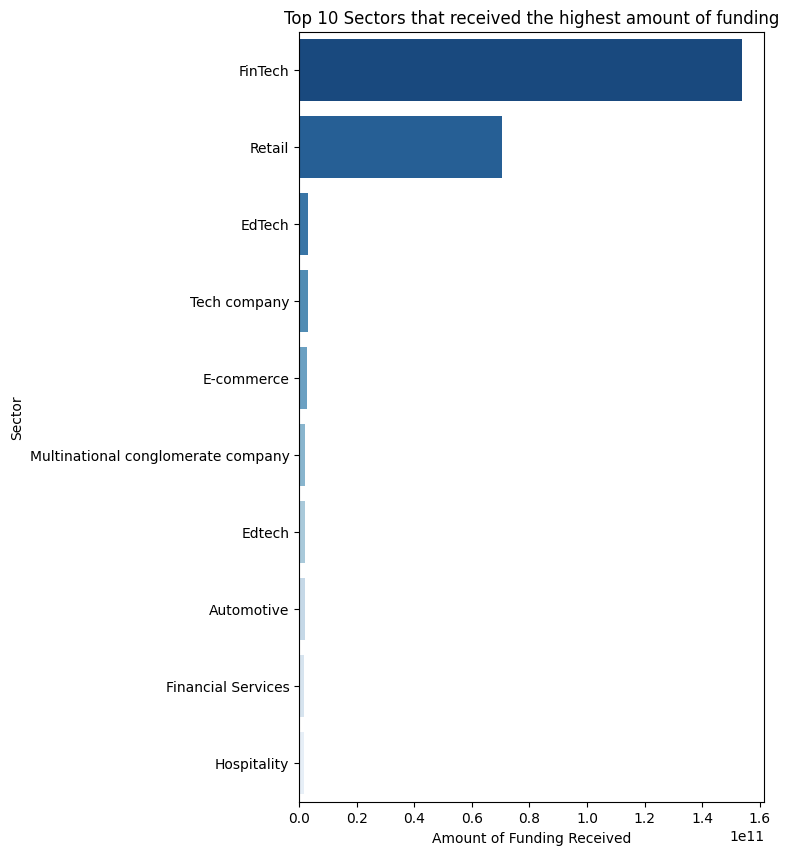

In [433]:
plt.figure(figsize=(6, 10))  


custom_palette = sns.color_palette("Blues_r", n_colors=len(top_10_sectors))

plt.title('Top 10 Sectors that received the highest amount of funding')
sns.barplot(y=top_10_sectors.index, x=top_10_sectors, palette=custom_palette)  
plt.xlabel('Amount of Funding Received')
plt.ylabel('Sector')
plt.show()


The sector with the highest funding is Fintech with 153.85 billion followed by retail with 70.54 billion and then EdTech with 3.13 billion 

2. which are top 10 companies that have received the most funds?

In [434]:
#group by sector and sum amounts
company_total = df_startup_funding.groupby('Company_Brand')['Amount'].sum()
company_total

Company_Brand
&ME                              0.00
1Bridge                    2500000.00
1Crowd                     3500000.00
1K Kirana Bazaar           7000000.00
1MG                        9900000.00
                             ...     
saarthi.ai                       0.00
srJna                            0.00
truMe                       140000.00
uFony Services Pvt ltd           0.00
upGrad                   145000000.00
Name: Amount, Length: 2214, dtype: float64

In [435]:
top_10_companies = company_total.sort_values(ascending=False).head(10)
top_10_companies

Company_Brand
Alteria Capital                150000000000.00
Reliance Retail Ventures Ltd    70000000000.00
Snowflake                        3000000000.00
Reliance                         2200000000.00
Swiggy                           1956000000.00
VerSe Innovation                 1550000000.00
BYJU'S                           1260000000.00
Dream Sports                     1240000000.00
Zomato                           1239000000.00
OYO                               965000000.00
Name: Amount, dtype: float64

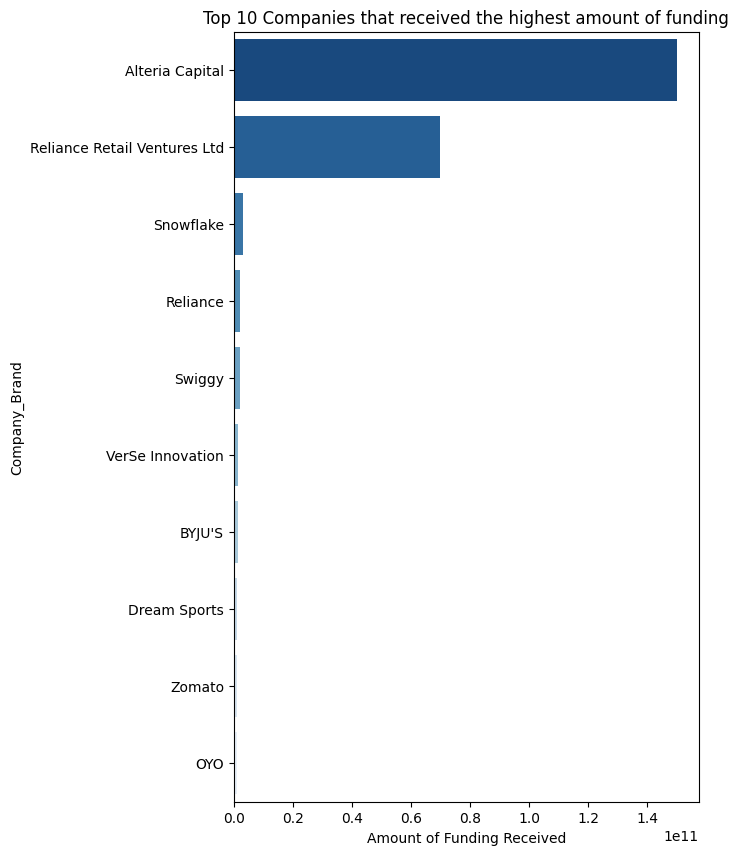

In [436]:
plt.figure(figsize=(6, 10))  


custom_palette = sns.color_palette("Blues_r", n_colors=len(top_10_companies))

plt.title('Top 10 Companies that received the highest amount of funding')
sns.barplot(y=top_10_companies.index, x=top_10_companies, palette=custom_palette)  
plt.xlabel('Amount of Funding Received')
plt.ylabel('Company_Brand')
plt.show()